##### Exam R answers by Javier López Rodríguez (javier.lopez.rodriguez@alumnos.upm.es)

- Load the files GDP.csv and HDI.csv using read.csv()

In [1]:
gdp <- read.csv("GDP.csv")
hdi <- read.csv("HDI.csv")

- Analyze the file that you have just loaded with head()  and str()

In [2]:
head(gdp)
str(gdp)
head(hdi)
str(hdi)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...


,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


- Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order() 

In [3]:
# ordering both data frames by Province and then combining them
combined.df <- cbind(gdp[order(gdp$Province), ], hdi[order(hdi$Province), ]) 
head(combined.df) # checking that everything is correct

,Province,GDP.per.capita,CCAA,Province,HDI
,<chr>,<dbl>,<chr>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,Albacete,17.864,Castilla-La Mancha,Albacete,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,Almería,20.873,Andalucía y Extremadura,Almería,0.915
12,Asturias,21.634,Asturias y Cantabria,Asturias,0.956
16,Ávila,18.382,Castilla y León,Ávila,0.952


- The new data frame will contain two columns names "Province". remove one of the columns

In [4]:
# keeping every column with unique name and the first column with duplicate name (removing the second one)
combined.df <- combined.df[ , !duplicated(names(combined.df))]
head(combined.df) # checking that everything is correct

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


- Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province	GDP.per.capita,	CCAA and HDI. **With each province matching its CCAA**. (Fig, 1)

In [5]:
head(combined.df)
tail(combined.df)
# everything seems to be fine
# each province matches its CCAA because we ordered both data frames by their provinces before binding them

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
29,Toledo,19.251,Castilla-La Mancha,0.933
36,Valencia,22.538,Comunitat Valenciana y Murcia,0.946
24,Valladolid,23.947,Castilla y León,0.978
50,Vizcaya,27.705,País Vasco Navarra y Rioja,0.988
25,Zamora,17.952,Castilla y León,0.959
11,Zaragoza,26.082,Aragon,0.968


- Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point).

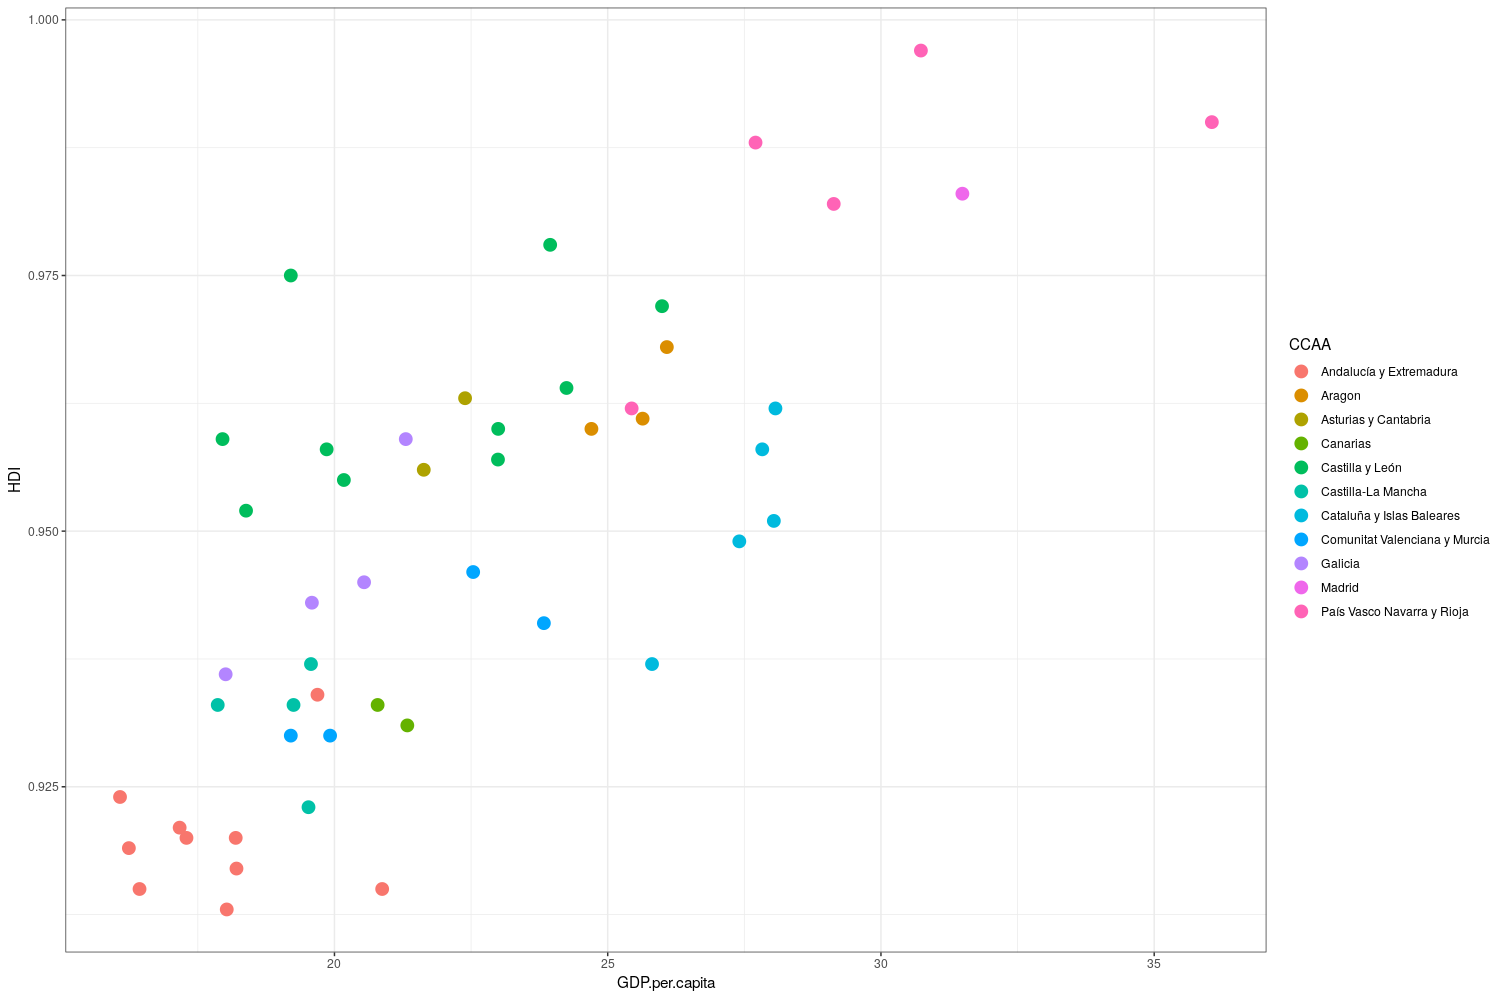

In [6]:
library(ggplot2) # loading ggplot2
# changing the size and the default theme
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 100)
theme_set(theme_bw())

# creating the plot
ggplot(combined.df, aes(x = GDP.per.capita, y = HDI)) + 
geom_point(size = 4, aes(color = CCAA)) 

- Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want. (Fig, 2)

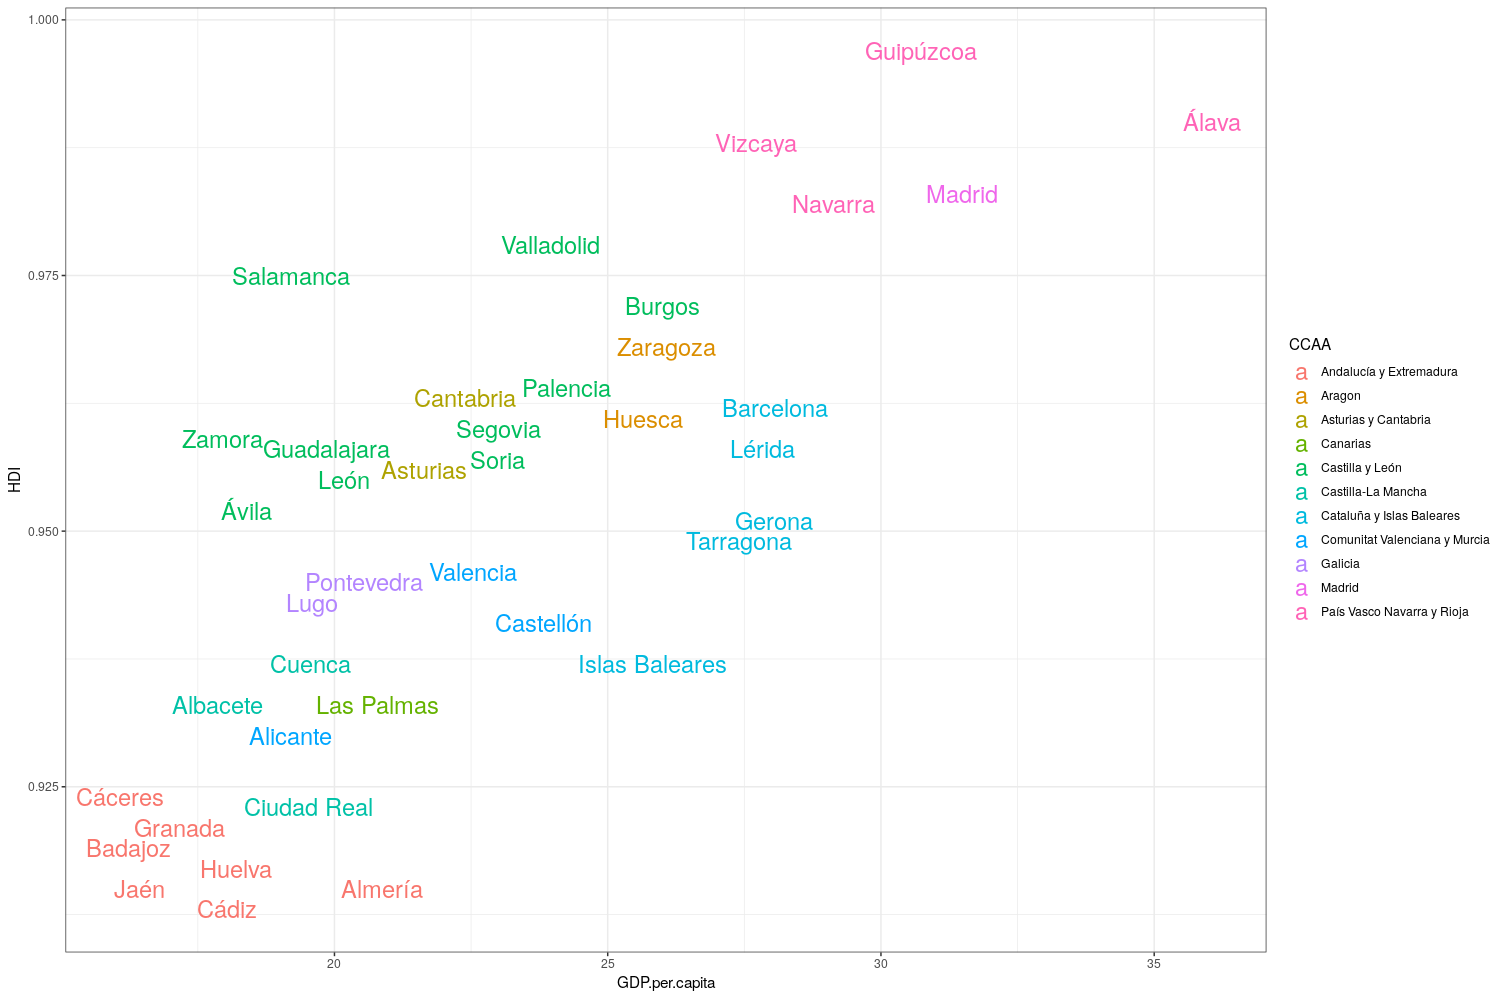

In [7]:
# creating the plot
ggplot(combined.df, aes(x = GDP.per.capita, y = HDI)) + 
geom_text(aes(color = CCAA, label = Province), size = 6, check_overlap = T) 

- Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().

In [8]:
print("mean GDP:")
(mean.GDP <- aggregate(formula = GDP.per.capita ~ CCAA, data = combined.df, FUN = mean))
print("stdev GDP:")
(stdev.GDP <- aggregate(formula = GDP.per.capita ~ CCAA, data = combined.df, FUN = sd))
print("mean HDI:")
(mean.HDI <- aggregate(formula = HDI ~ CCAA, data = combined.df, FUN = mean))
print("stdev HDI:")
(stdev.HDI <- aggregate(formula = HDI ~ CCAA, data = combined.df, FUN = sd))
# I surrounded the assignment expressions between () so that the result gets printed

[1] "mean GDP:"


CCAA,GDP.per.capita
<chr>,<dbl>
Andalucía y Extremadura,17.81970
Aragon,25.47433
Asturias y Cantabria,22.01200
Canarias,21.06150
Castilla y León,21.57390
Castilla-La Mancha,19.05250
Cataluña y Islas Baleares,27.43120
Comunitat Valenciana y Murcia,21.37275
Galicia,19.86075


[1] "stdev GDP:"


CCAA,GDP.per.capita
<chr>,<dbl>
Andalucía y Extremadura,1.5391112
Aragon,0.7045824
Asturias y Cantabria,0.5345727
Canarias,0.3839590
Castilla y León,2.7926986
Castilla-La Mancha,0.8047768
Cataluña y Islas Baleares,0.9434594
Comunitat Valenciana y Murcia,2.1781260
Galicia,1.4205488


[1] "mean HDI:"


CCAA,HDI
<chr>,<dbl>
Andalucía y Extremadura,0.91980
Aragon,0.96300
Asturias y Cantabria,0.95950
Canarias,0.93200
Castilla y León,0.96300
Castilla-La Mancha,0.93150
Cataluña y Islas Baleares,0.95140
Comunitat Valenciana y Murcia,0.93675
Galicia,0.94575


[1] "stdev HDI:"


CCAA,HDI
<chr>,<dbl>
Andalucía y Extremadura,0.005977736
Aragon,0.004358899
Asturias y Cantabria,0.004949747
Canarias,0.001414214
Castilla y León,0.008956686
Castilla-La Mancha,0.005972158
Cataluña y Islas Baleares,0.009607289
Comunitat Valenciana y Murcia,0.008057088
Galicia,0.009639329


- Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI

In [9]:
mean.sd.df <- data.frame(CCAA = mean.GDP$CCAA, 
                         mean.GDP = mean.GDP$GDP.per.capita, 
                         mean.HDI = mean.HDI$HDI, 
                         stdev.GDP = stdev.GDP$GDP.per.capita, 
                         stdev.HDI = stdev.HDI$HDI) # setting the column names directly in data.frame
head(mean.sd.df) # checking

,CCAA,mean.GDP,mean.HDI,stdev.GDP,stdev.HDI
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Andalucía y Extremadura,17.81970,0.9198,1.5391112,0.005977736
2,Aragon,25.47433,0.9630,0.7045824,0.004358899
3,Asturias y Cantabria,22.01200,0.9595,0.5345727,0.004949747
4,Canarias,21.06150,0.9320,0.3839590,0.001414214
5,Castilla y León,21.57390,0.9630,2.7926986,0.008956686
6,Castilla-La Mancha,19.05250,0.9315,0.8047768,0.005972158


- Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na(). (Fig, 3)

In [10]:
mean.sd.df[is.na(mean.sd.df)] <- 0 # replacing every NA position of mean.sd.df with 0

- Plot again the original scatterplot with geom_point and color by CCAA. 

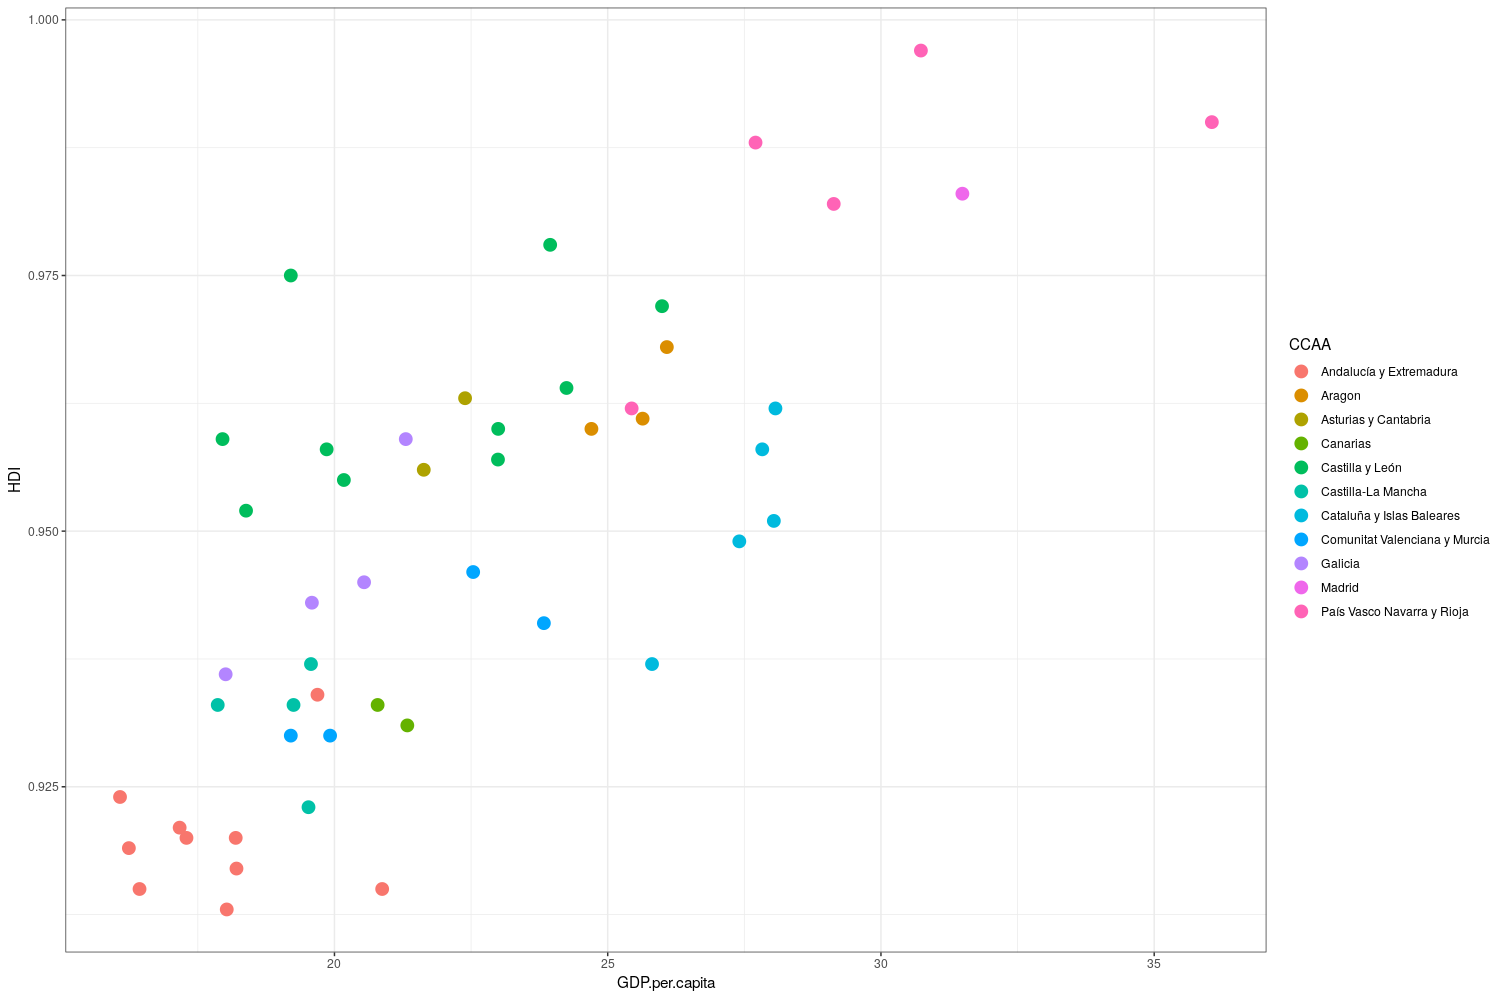

In [11]:
# creating the plot
ggplot(combined.df, aes(x = GDP.per.capita, y = HDI)) + 
geom_point(size = 4, aes(color = CCAA))

- Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces. 

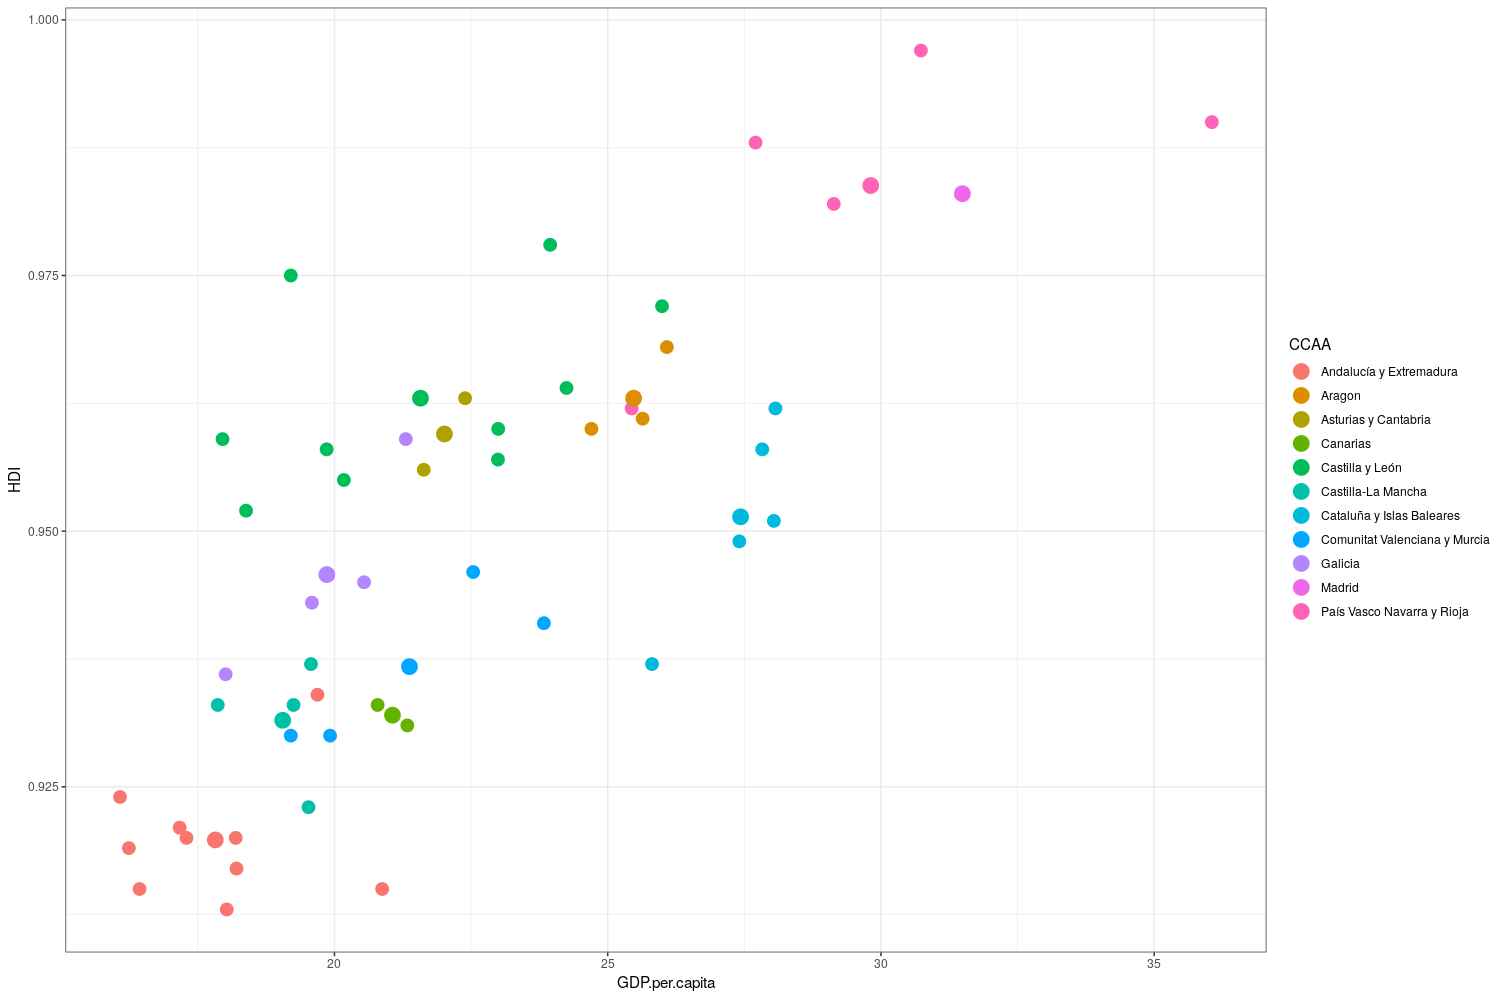

In [12]:
# we don't include the data frame inside ggplot() because we will be using multiple data frames
ggplot() + 
geom_point(data = combined.df, aes(x = GDP.per.capita, y = HDI, color = CCAA), size = 4) +
geom_point(data = mean.sd.df, aes(x = mean.GDP, y = mean.HDI, color = CCAA), size = 5)

- Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, y, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters x, y, xmin and xmax.

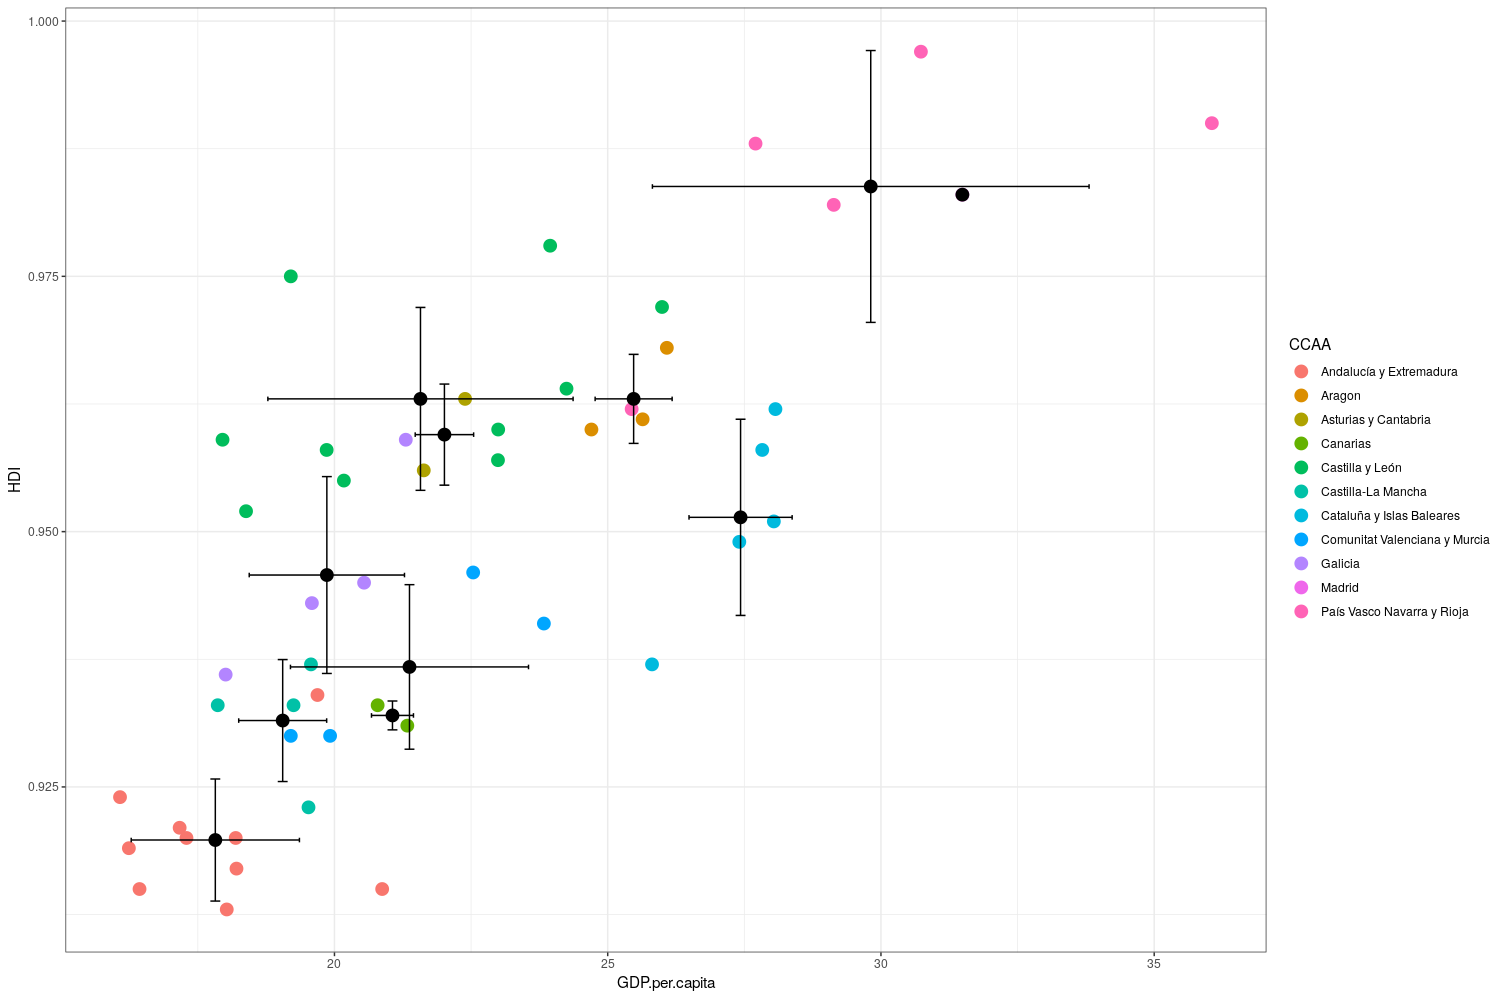

In [13]:
ggplot() + 
geom_point(data = combined.df, aes(x = GDP.per.capita, y = HDI, color = CCAA), size = 4) +
geom_point(data = mean.sd.df, aes(x = mean.GDP, y = mean.HDI), size = 4) + 
geom_errorbar(data = mean.sd.df, aes(x = mean.GDP, ymin = mean.HDI - stdev.HDI , ymax = mean.HDI + stdev.HDI)) +
geom_errorbarh(data = mean.sd.df, aes(y = mean.HDI, xmin = mean.GDP - stdev.GDP , xmax = mean.GDP + stdev.GDP))

- Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters  hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points (Fig, 4)

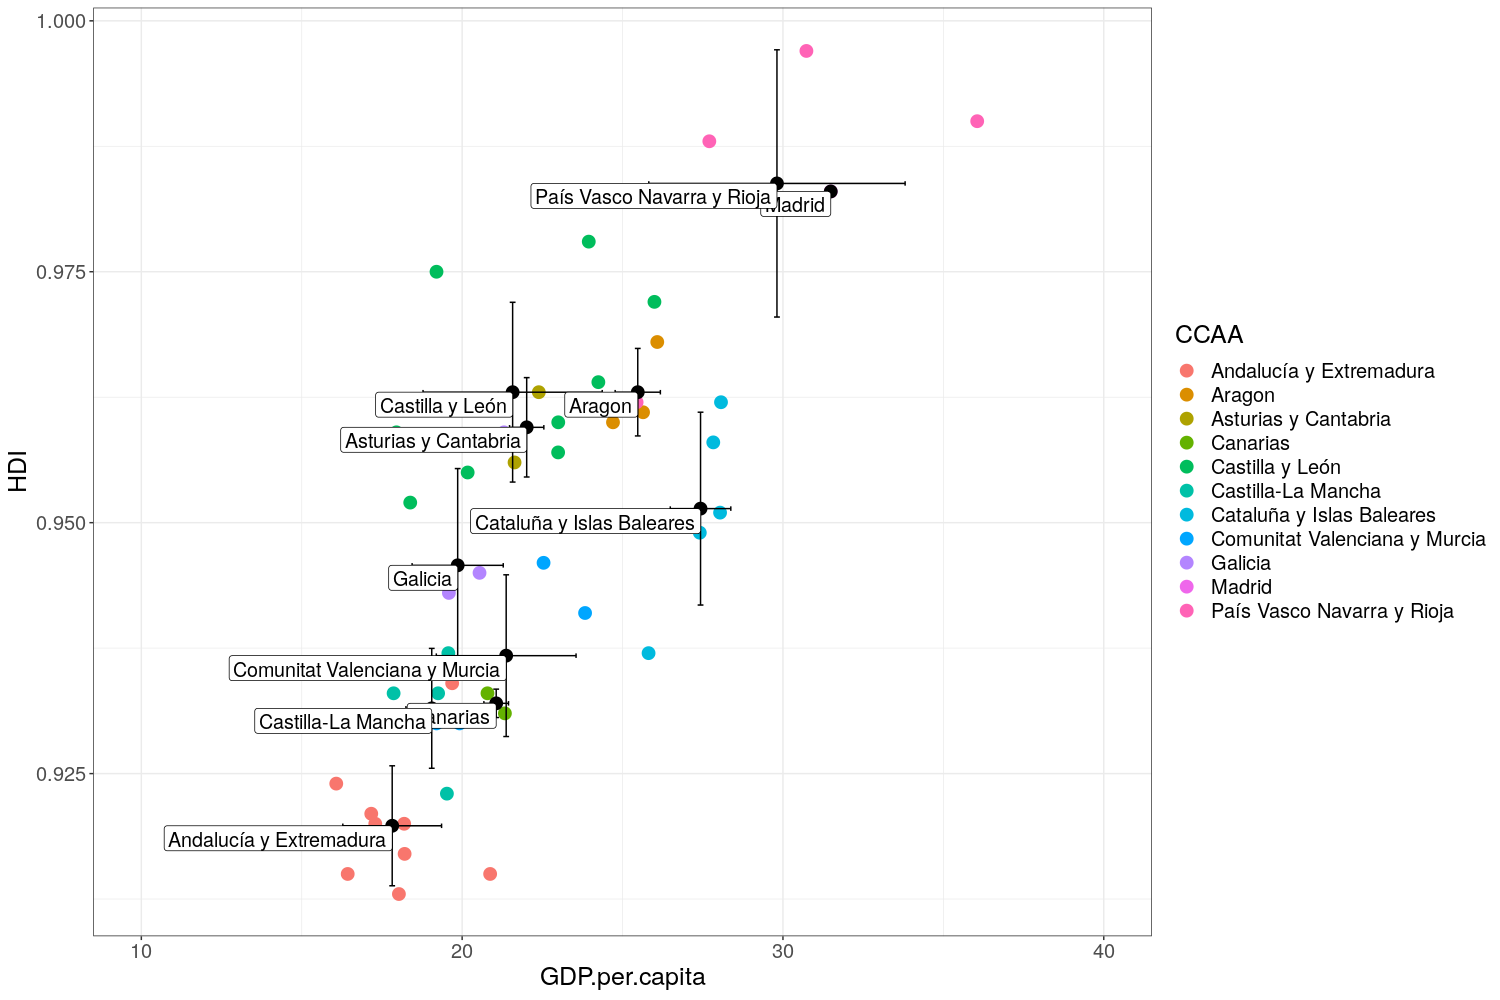

In [14]:
ggplot() + 
geom_point(data = combined.df, aes(x = GDP.per.capita, y = HDI, color = CCAA), size = 4) +
geom_point(data = mean.sd.df, aes(x = mean.GDP, y = mean.HDI), size = 4) + 
geom_errorbar(data = mean.sd.df, aes(x = mean.GDP, ymin = mean.HDI - stdev.HDI , ymax = mean.HDI + stdev.HDI)) +
geom_errorbarh(data = mean.sd.df, aes(y = mean.HDI, xmin = mean.GDP - stdev.GDP , xmax = mean.GDP + stdev.GDP)) +
geom_label(data = mean.sd.df, aes(x = mean.GDP, y = mean.HDI, label = CCAA), size = 5, hjust = 1, vjust = 1) + 
scale_x_continuous(limit = c(10, 40)) + # changing the limits of the x axis so that the labels don't get cut off
theme(text = element_text(size = 18)) # increasing the text size

- *(Optional)* It looks like that GDP is strongly correlated with HDI (the dots follow a straight line). <br> However, you should know that the formula for HDI is (roughly) LifeExpectancy + EducationIndex + GDP. <br>
Do you think there is something weird? Do you still think that concluding, by simply looking at the chart, that increasing the GDP you can increase the human development of their citizens (or viceversa)? If not, why? Should we maybe compare GDP and HDI in a different way?

In [15]:
linear.model <- lm(formula = mean.HDI ~ mean.GDP, data = mean.sd.df)
summary(linear.model)


Call:
lm(formula = mean.HDI ~ mean.GDP, data = mean.sd.df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.016559 -0.008533 -0.001096  0.007131  0.018329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.8588949  0.0189068  45.428 6.07e-12 ***
mean.GDP    0.0039759  0.0007959   4.995 0.000744 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01138 on 9 degrees of freedom
Multiple R-squared:  0.7349,	Adjusted R-squared:  0.7055 
F-statistic: 24.95 on 1 and 9 DF,  p-value: 0.0007436


By creating a linear regression model between the mean HDI and mean GDP, we can see in its summary that the R-squared coefficient is roughly 0.7 (that is, the linear model explains ~70% of the variance of the data). The remaining 30% of the variance might be explained by the other variables (life expectancy, education index...).

I think that if we increased the GDP, the HDI would probably also increase (and viceversa), although we would need to consider the other variables that explain the 30% of the variability, because they might also be involved.


